<a href="https://colab.research.google.com/github/SushilKokare/Deep_Learning_Lab/blob/main/5_Multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense,Input,Conv2D,MaxPooling2D,Dropout,Flatten
from keras import backend as k
import keras

In [34]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [35]:
img_rows , img_cols = 28,28

In [36]:
def printshape():
  print(x_train.shape)
  print(y_train.shape)
  print(x_test.shape)
  print(y_test.shape)

In [37]:
printshape()

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [38]:
if k.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
  x_test = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
  inpx = (1,img_rows,img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
  x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
  inpx = (img_rows,img_cols,1)

In [39]:
printshape()

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [40]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [67]:
x_train[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.05490196],
       [0.00392157],
       [0.6039216 ],
       [0.99215686],
       [0.3529412 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

In [42]:
y_train[0]

5

In [43]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [44]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [45]:
# defining model
inpx = Input(shape=inpx)
l1 = Conv2D(32,(3,3),activation='relu')(inpx)
l2 = Conv2D(64,(3,3),activation='relu')(l1)
l3 = MaxPooling2D(pool_size=(3,3))(l2)
l4 = Dropout(rate=0.5)(l3)
l5 = Flatten()(l4)
l6 = Dense(250,activation='sigmoid')(l5)
l7 = Dense(10,activation='softmax')(l6)

model = Model([inpx],l7)


In [46]:
# compile model
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [59]:
# train model
history = model.fit(x=x_train,y=y_train,epochs=30,batch_size=100,verbose=0)

In [60]:
score = model.evaluate(x=x_test,y=y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4385 - accuracy: 0.8763


In [61]:
print('Loss = ',score[0])
print('Accuracy = ',score[1])

Loss =  0.4384767711162567
Accuracy =  0.8762999773025513


In [62]:
import matplotlib.pyplot as plt

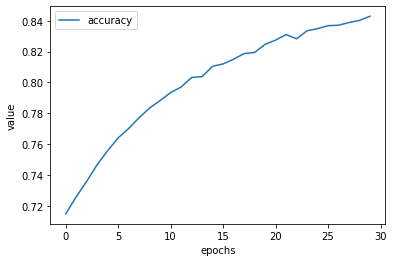

In [63]:
plt.figure()
plt.xlabel('epochs')
plt.ylabel('value')
x = history.history['accuracy']
plt.plot(x,label='accuracy')
plt.legend()

In [64]:
import pandas as pd

In [65]:
pd.DataFrame(history.history).head(2)

,loss,accuracy
0,1.370054,0.714783
1,1.264236,0.725850


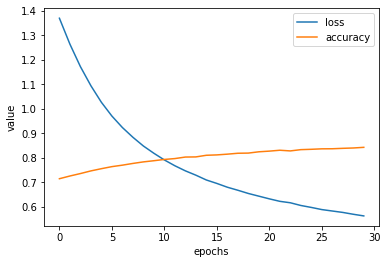

In [66]:
plt.figure()
plt.xlabel('epochs')
plt.ylabel('value')
for i in ['loss','accuracy']:
  x = history.history[i]
  plt.plot(x,label=i)
  plt.legend()